### Generate synthetic dataset

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [40]:
X, y = make_classification(n_samples=2000, n_classes=2, 
                           n_features=10, random_state=0)

In [41]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200*n_features)]

### Data splitting

In [42]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### Build classification model

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Prediction probabilities 

In [46]:
r_probs = [0 for _ in range(len(y_test))]   # for random sample 
nb_probs= nb.predict_proba(X_test)

In [47]:
nb_probs = nb_probs[:, 1]

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

### Calculate AUC-ROC

In [1]:
r_auc = roc_auc_score(y_test, r_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

NameError: name 'roc_auc_score' is not defined

In [50]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Naive Bayes: AUROC = 0.993


### Calculate ROC curve

In [51]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

### Plot the ROC curve

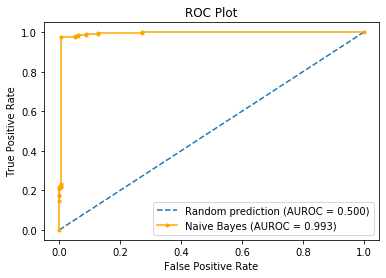

In [52]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc, color='orange')

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()